In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
#from google.colab import files
#from google.colab import drive
import matplotlib.pyplot as plt


# Getting Billboard Top 100 Data

In [ ]:
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [ ]:
# Get annual billboard top 100
def get_billboard(years=range(2010, 2021, 1)):
  top_list = pd.DataFrame()

  for year in years:
    url = 'http://billboardtop100of.com/{}-2/'.format(year)
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'lxml')
    # print(soup.title)
    data = []
    
    table = soup.find('table')
    
    try: 
      for row in table.find_all("tr"):
        data.append([x.get_text().strip() for x in row.find_all('td')])
    except:
      continue
    standings = pd.DataFrame(data, columns=['Rank', 'Artist', 'Track'])
    standings['Year'] = [year] * len(standings)
    top_list = top_list.append(standings, ignore_index=True)
    print(year, 'finished!')
    time.sleep(1)
  return top_list

In [ ]:
billboard_list = get_billboard()

2010 finished!
2011 finished!
2012 finished!
2014 finished!
2015 finished!
2016 finished!


In [ ]:
billboard_list.to_csv('billboard.csv')

In [ ]:
billboard_list

,Rank,Artist,Track,Year
0,1,Ke$ha,TiK ToK,2010
1,2,Lady Antebellum,Need You Now,2010
2,3,Train,"Hey, Soul Sister",2010
3,4,Katy Perry feat. Snoop Dogg,California Gurls,2010
4,5,Usher feat. will.i.am,OMG,2010
...,...,...,...,...
595,96,Tim McGraw,Humble And Kind\nLYRICS,2016
596,97,Future,Wicked\nLYRICS,2016
597,98,Desiigner,Tiimmy Turner\nLYRICS,2016
598,99,Wiz Khalifa feat. Charlie Puth,See You Again\nLYRICS,2016


# Spotify Data Preprocessing

In [ ]:
#import_data = pd.read_csv('/content/drive/MyDrive/dataset.csv')
import_data = pd.read_csv('dataset_finalized.csv')

In [ ]:
data = import_data.copy()

In [ ]:
data['release_date'] = data['release_date'].apply(lambda x: int(float(str(x)[:4])))

In [ ]:
data = data.drop(data.index[data['release_date'] < 2011])

<AxesSubplot:>

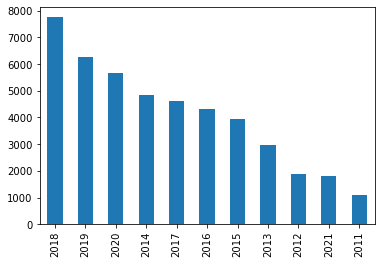

In [ ]:
data['release_date'].value_counts().plot(kind='bar')

In [ ]:
data['release_date'].value_counts()

2018    7754
2019    6265
2020    5672
2014    4833
2017    4626
2016    4305
2015    3961
2013    2961
2012    1874
2021    1805
2011    1110
Name: release_date, dtype: int64

In [ ]:
data.drop(data.columns[0], axis=1, inplace=True)
data.tail()

,artist_name,track_name,track_id,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Top_100
45765,Jhené Aiko,P*$$Y Fairy (OTW),48KXAIruJ07kJVCWOGohMV,71,2020,0.572,0.519,2.0,-7.092,0.0,0.2120,0.53600,0.000000,0.102,0.350,128.331,181860,4.0,1
45766,Surf Mesa Emilee,ily (i love you baby) (feat. Emilee),62aP9fBQKYKxi7PDXwcUAS,80,2020,0.674,0.774,11.0,-7.567,0.0,0.0892,0.06860,0.001880,0.393,0.330,112.050,176547,4.0,1
45767,Morgan Wallen,More Than My Hometown,5OELUCYgOHKFAvCERnAvfS,76,2020,0.620,0.869,6.0,-5.479,1.0,0.0462,0.61500,0.000000,0.131,0.597,126.019,216573,4.0,1
45768,Luke Combs,Lovin' On You,0nYvjcSlCgjcwogQAwIwNp,70,2020,0.572,0.949,4.0,-4.865,1.0,0.0600,0.00165,0.000195,0.163,0.530,118.974,194867,4.0,1
45769,Moneybagg Yo,Said Sum,3sKz6Sd72K0ofPWcJPPk6H,69,2020,0.929,0.667,8.0,-6.789,0.0,0.3530,0.01850,0.000000,0.100,0.274,126.998,155168,4.0,1


# Start dealing with classification
## 1. Using previous label to predict the next year label

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import matplotlib as plt
import seaborn as sns

<AxesSubplot:xlabel='Top_100', ylabel='popularity'>

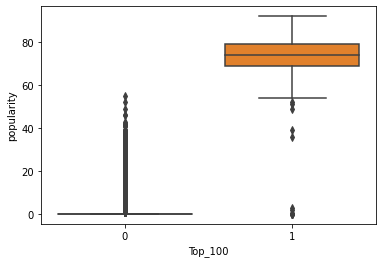

In [ ]:
sns.boxplot(x='Top_100', y='popularity',data=data)

In [ ]:
X_columns = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
y_columns = ['Top_100']

In [ ]:
def get_features(train_year, test_year, data=data, X_features=X_columns, y_feature=y_columns):
    df_train = data[data['release_date'] == train_year]
    df_test = data[data['release_date'] == test_year]
    x_train, y_train = df_train[X_features], df_train[y_feature]
    x_test, y_test = df_test[X_features], df_test[y_feature]

    return x_train, y_train, x_test, y_test
    

In [ ]:
x_2011, y_2011, x_2012, y_2012 = get_features(2019, 2020)

In [ ]:
clf = LogisticRegression(random_state=0).fit(x_2011, y_2011)
y_pred = clf.predict(x_2012)
print('Train data: ')
print(classification_report(y_2011, clf.predict(x_2011)))
print('Test data: ')
print(classification_report(y_2012, y_pred))


Train data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6205
           1       1.00      0.97      0.98        60

    accuracy                           1.00      6265
   macro avg       1.00      0.98      0.99      6265
weighted avg       1.00      1.00      1.00      6265

Test data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5588
           1       1.00      0.96      0.98        84

    accuracy                           1.00      5672
   macro avg       1.00      0.98      0.99      5672
weighted avg       1.00      1.00      1.00      5672



/Users/ming-hunghung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
